In [5]:
import torch
import numpy as np
from Modouls.PMTNet import PMTNet
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
from torchvision import transforms as transforms

In [2]:
# load
Qdevice = 'cuda'
net = PMTNet().to(Qdevice)
ckp_path='./model/DWCcolor19_lossC_model_of_epoch_341'
obj = torch.load(ckp_path)
print(obj['clock'])
net.load_state_dict({  k.replace('module.',''):v for k,v in obj['net'].items() } )

850795


<All keys matched successfully>

In [11]:
def ishow(im,w=6,h=4):
    plt.figure(figsize=(w,h)) 
    plt.imshow(im) # 显示图片|
    plt.show()
mean=(0.5,0.5,0.5)
std=(0.5,0.5,0.5)
transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean, std) 
        ])
FG = transforms.Normalize((-1,-1,-1),(2.,2.,2.) )

In [9]:
O=cv2.imread('./Data/res_09259_Moire.png')
O = Image.fromarray(O)
O = transform(O)
O.unsqueeze_(0)
O = O.cuda()

with torch.no_grad():
    out, _, _ = net(O)
    out = out.to('cpu')
    mout = np.transpose(FG(out[0]).numpy(),(1,2,0) )
    cv2.imwrite('./Output/out.png', mout*255)

/home/nls1/.conda/envs/lzh_pt16/lib/python3.6/site-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/home/nls1/.conda/envs/lzh_pt16/lib/python3.6/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


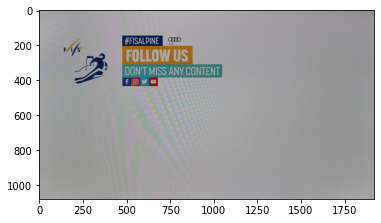

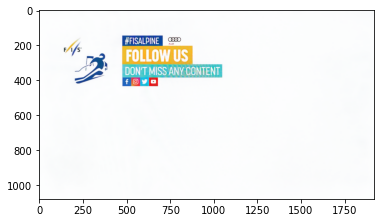

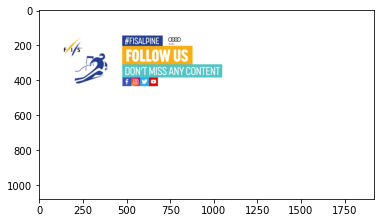

In [12]:

mo = Image.open( './Data/res_09259_Moire.png')
mo = np.array(mo)
ishow(mo)
ours = Image.open( './Output/out.png')
ours = np.array(ours)
ishow(ours)
gt = Image.open( './Data/res_09259_GT.png')
gt = np.array(gt)
ishow(gt)

